In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import plotly.graph_objects as go

# Ejercicio en Clase

Utilizar Matplot y Plotly para realizar las graficas.

### 1 Con los datos de Fifa, organizar a los jugadores de acuerdo al peso en las siguientes escalas y generar un cuadro tipo PIE

* Debajo 125 Lbs.
* 125-150
* 150-175
* 175 o superior

In [2]:
datos = pd.read_csv('fifa_datos.csv',',')
pd.set_option('display.max_columns', None)
datos.head(10)

/home/elfloro/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,8

In [3]:
#Los datos de peso tienen las letras  'lbs' incluidas en el dato, por lo que es necesario remover eso realizar una convercion de datos (ejecutar esto 2 veces causa error) 
datos['Weight'] = datos['Weight'].str.replace('lbs', '')
datos['Weight'] = pd.to_numeric(datos['Weight'] )


#Se crean listas donde se almacenaran quienes esten bajo lo pedido
#Debajo de 125 lbs
l1=datos.loc[datos['Weight'] < 125]
#125 lbs a 150 lbs
l2=datos.loc[(datos['Weight'] >= 125) & (datos['Weight'] < 150)]
#150 lb a 175 lbs
l3=datos.loc[(datos['Weight'] >= 150) & (datos['Weight'] < 175)]
#175 lbs o superior
l4=datos.loc[datos['Weight'] >= 175]


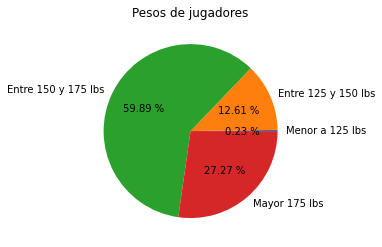

In [4]:
# Generacion del diagrama de pastel
plt.figure()

etiquetas = ['Menor a 125 lbs', 'Entre 125 y 150 lbs', 'Entre 150 y 175 lbs', 'Mayor 175 lbs']
plt.pie([len(l1), len(l2), len(l3), len(l4)], labels=etiquetas, autopct='%.2f %%')
plt.title('Pesos de jugadores')
plt.savefig("Diagrama Pastel.png")
plt.show()



### 2 Generar un grafico de barras (histograma) de acuerdo a su habilidad (Overall)  en base a los siguientes segmentos contando el número de jugadores

* 40
* 50
* 60
* 70
* 80
* 90


In [5]:
#Este es mas simple, es casi lo mismo

l40=datos.loc[(datos['Overall'] >= 40) & (datos['Overall'] < 50)]
l50=datos.loc[(datos['Overall'] >= 50) & (datos['Overall'] < 60)]
l60=datos.loc[(datos['Overall'] >= 60) & (datos['Overall'] < 70)]
l70=datos.loc[(datos['Overall'] >= 70) & (datos['Overall'] < 80)]
l80=datos.loc[(datos['Overall'] >= 80) & (datos['Overall'] < 90)]
l90=datos.loc[(datos['Overall'] >= 90) & (datos['Overall'] < 100)]



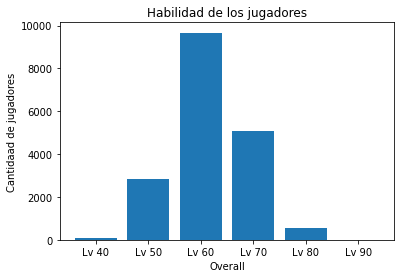

In [6]:
#Generamos el grafico de barras, recordando que se debe contar el numero de elementos en cada lista

eje_x = ['Lv 40','Lv 50','Lv 60','Lv 70','Lv 80','Lv 90']
eje_y = [len(l40), len(l50), len(l60), len(l70), len(l80), len(l90)]

plt.figure()
plt.title('Habilidad de los jugadores')
plt.bar(eje_x, eje_y)
plt.ylabel('Cantidaad de jugadores')
plt.xlabel('Overall')
plt.savefig("Diagrama Barras.png")
plt.show()

### 3 Investigar alguna herramienta o software que permita generar reportes con Python utilizando CodeLabs.

In [7]:
#Para generar el infome que contenga las graficas obtenidas, usamos FPDF

from fpdf import FPDF

class PDF(FPDF):
    def __init__(self):
        super().__init__()
        self.WIDTH = 210
        self.HEIGHT = 297
        
    def header(self):
        # Custom logo and positioning
        # Create an `assets` folder and put any wide and short image inside
        # Name the image `logo.png`
        #self.image('assets/logo.png', 10, 8, 33)
        self.set_font('Arial', 'B', 11)
        self.cell(self.WIDTH - 80)
        self.cell(60, 1, 'Reporte de Fifa', 0, 0, 'R')
        self.ln(20)
        
    def footer(self):
        # Page numbers in the footer
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.set_text_color(128)
        self.cell(0, 10, 'Page ' + str(self.page_no()), 0, 0, 'C')

    def page_body(self, images):
        # Determine how many plots there are per page and set positions
        # and margins accordingly

        #Este es el numero de imagenes por pagina

        # if len(images) == 3:
        #     self.image(images[0], 15, 25, self.WIDTH - 30)
        #     self.image(images[1], 15, self.WIDTH / 2 + 5, self.WIDTH - 30)
        #     self.image(images[2], 15, self.WIDTH / 2 + 90, self.WIDTH - 30)
        # elif len(images) == 2:

        self.image(images[0], 15, 20, self.WIDTH - 30)

        self.image(images[1], 15, self.WIDTH / 2 + 5, self.WIDTH - 30)


        #else:
            #self.image(images[0], 15, 25, self.WIDTH - 30)
            
    def print_page(self, images):
        # Generates the report
        self.add_page()
        self.page_body(images)

Un vez definida como va ser la estructura de generacion del informe, solo queda ponerle los datos que usara

In [8]:
imagenes= [["Diagrama Pastel.png","Diagrama Barras.png"]]

pdf = PDF()

for elem in imagenes:
    pdf.print_page(elem)
    
pdf.output('InformeFifa.pdf', 'F')

''